# 📌 **Group Number: 10**

---

## **Group Members:**

- Mehar Sukthi Buruguru 
- Rupeshwar Rao   
- Nandan Varma Pericharla   
- Shyamalan Kannan    

---



In [24]:
import pandas as pd

file_path = "E Commerce Dataset.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
xls.sheet_names


['Data Dict', 'E Comm']

In [25]:
# Load the "Data Dict" sheet to inspect the data dictionary
data_dict = pd.read_excel(xls, sheet_name="Data Dict")

# Display the first few rows of the data dictionary
data_dict.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer


In [26]:
# Load the "E Comm" sheet (main dataset)
df = pd.read_excel(xls, sheet_name="E Comm")

# Display the first few rows of the dataset
df.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [27]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

In [28]:
# Compute mean, median, and standard deviation for numerical columns
num_stats = df.select_dtypes(include=['number']).describe().loc[['mean', '50%', 'std']]
num_stats.rename(index={'50%': 'median'}, inplace=True)

# Display statistics
num_stats


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
median,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036


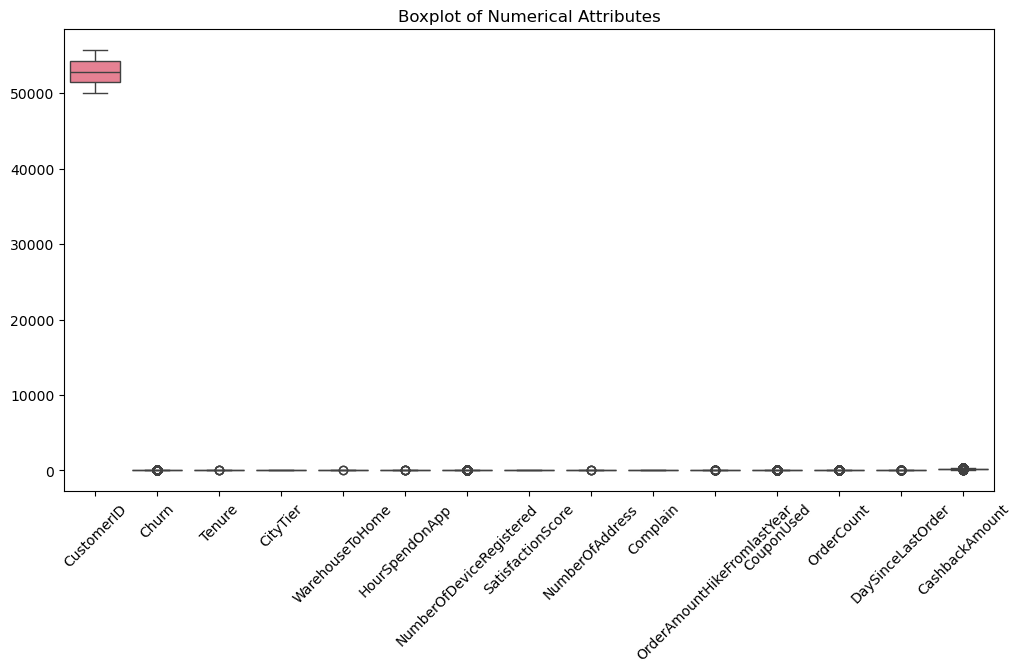

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplots for numerical columns
sns.boxplot(data=df.select_dtypes(include=['number']))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Attributes")
plt.show()


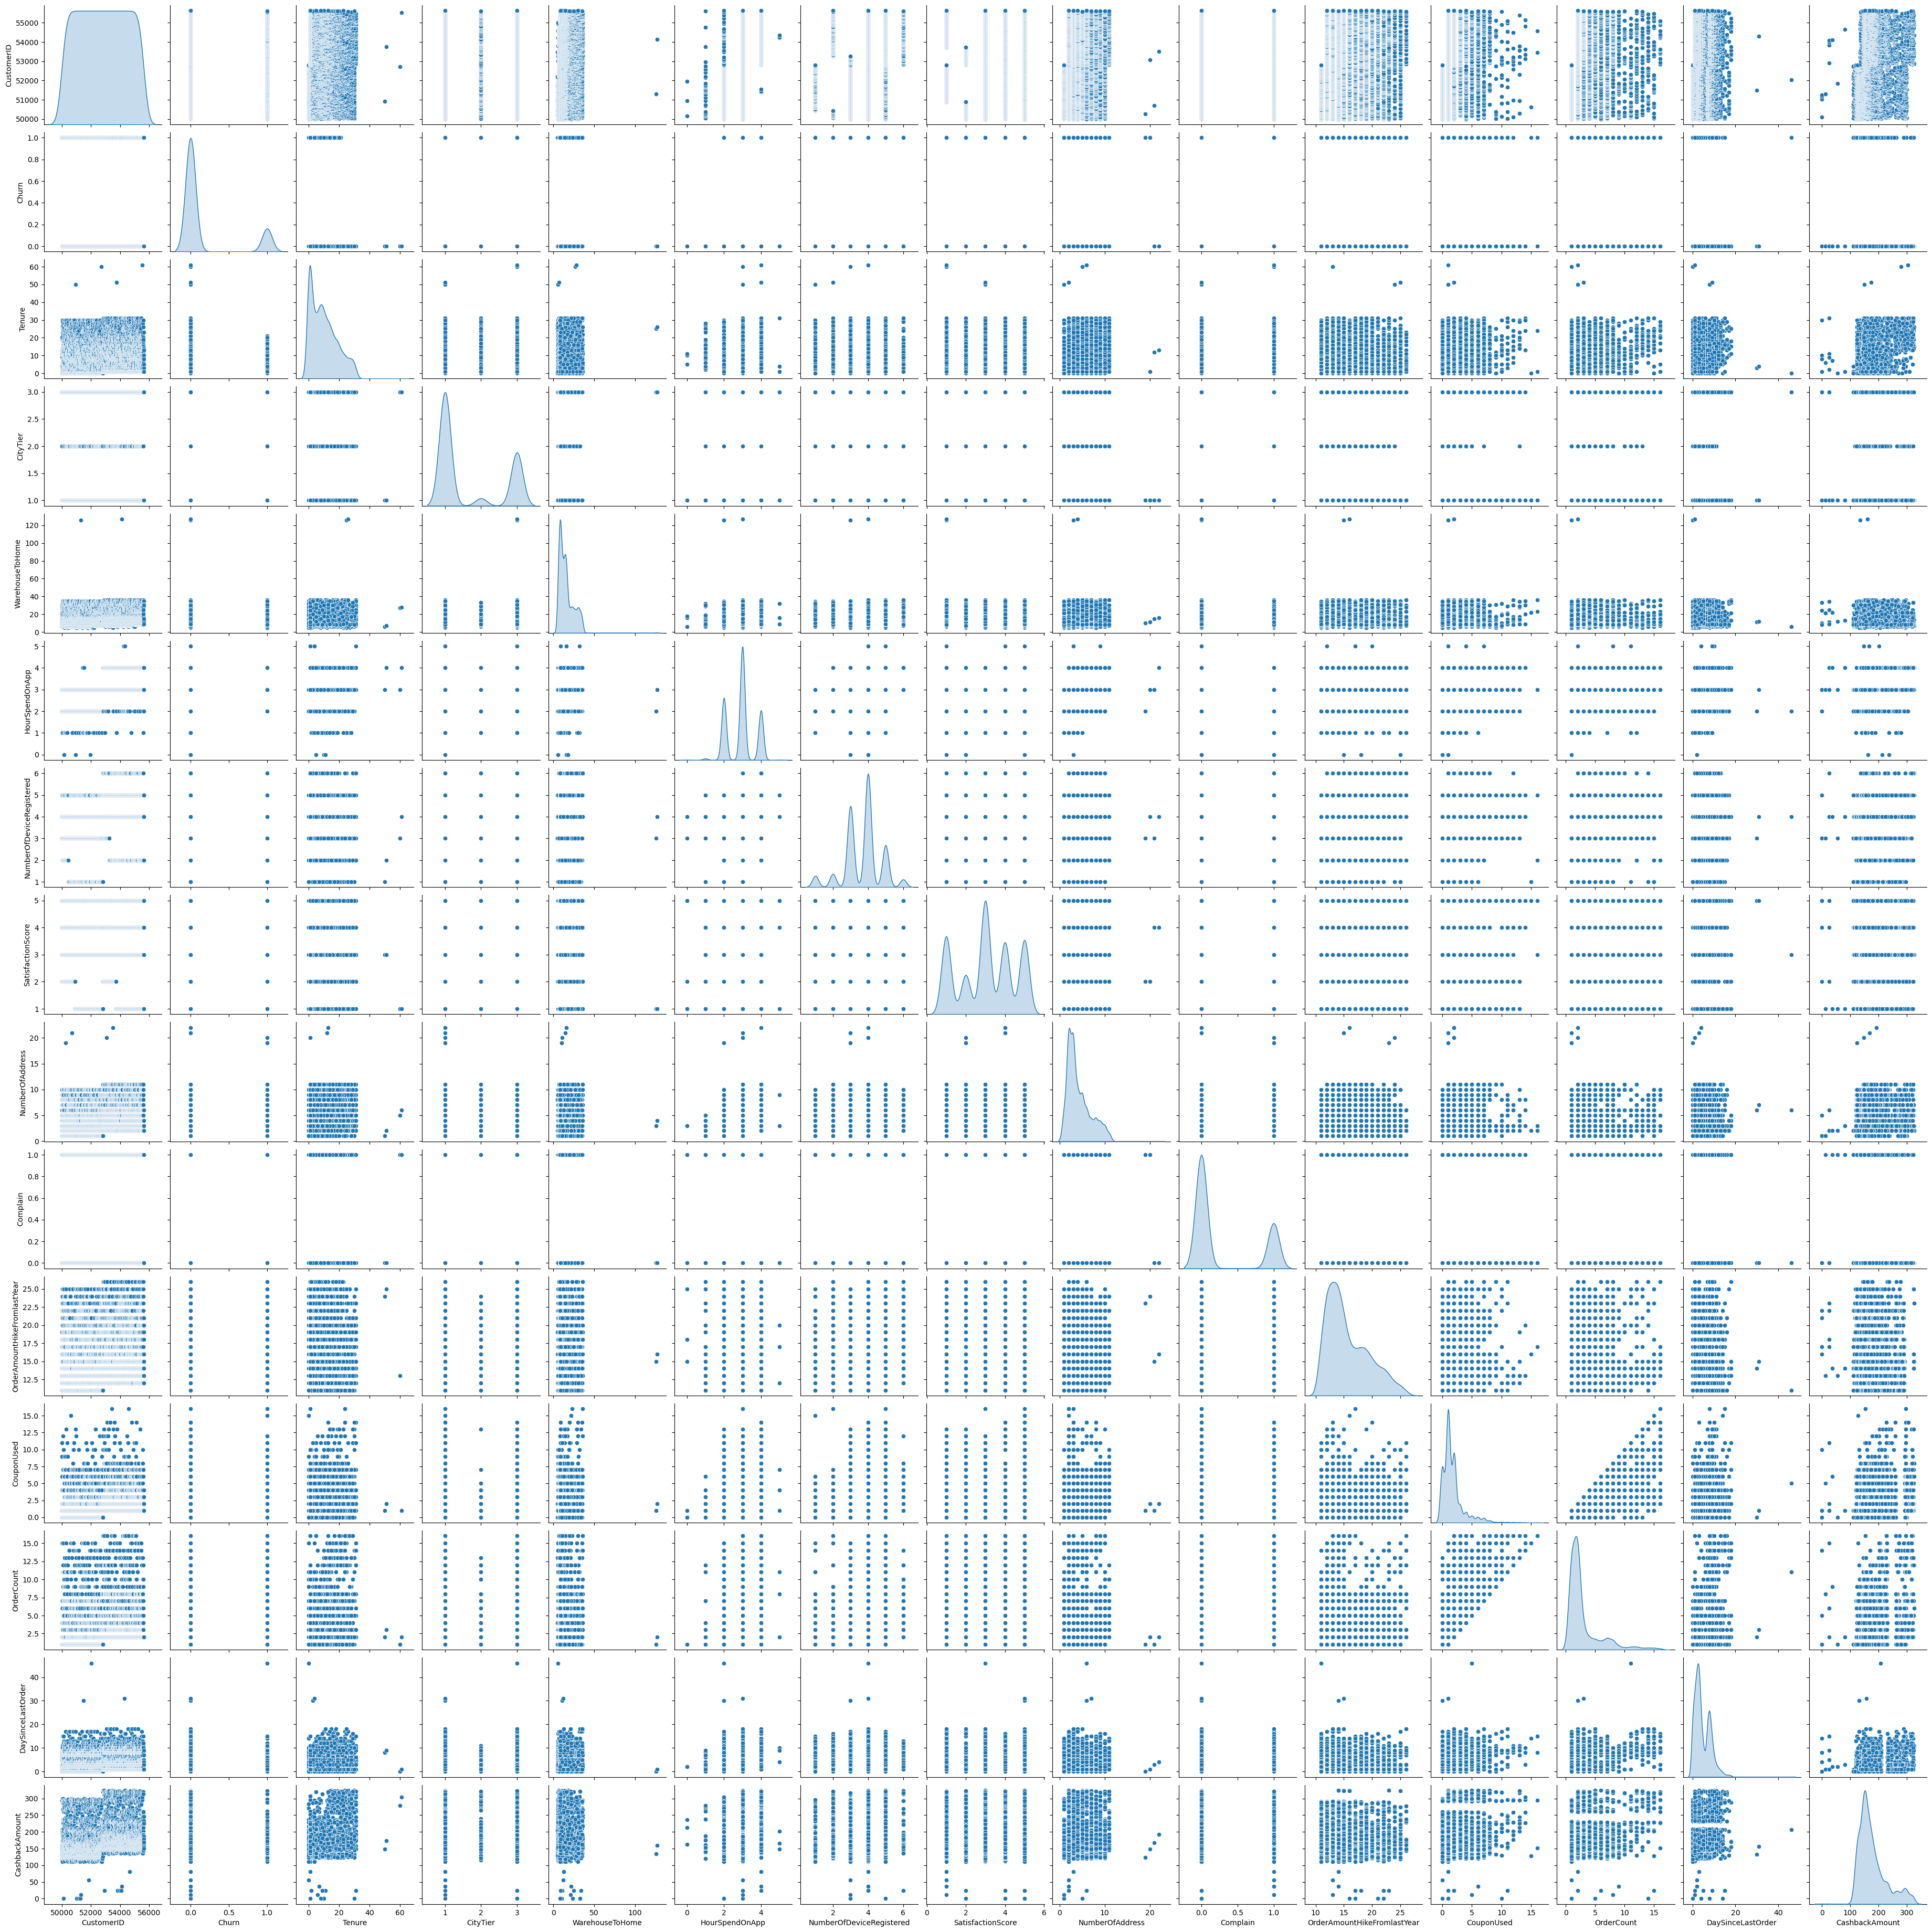

In [30]:
# Generate pairplot for numerical attributes
sns.pairplot(df.select_dtypes(include=['number']), diag_kind='kde')
plt.show()
